In [142]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

data = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
data = data.drop_duplicates() # Drop duplicates 
data.columns = data.columns.str.lower().str.strip().str.replace(' ', '_') # Standardize column names
data = data.reindex(sorted(data.columns), axis=1).reset_index(drop = True) # Sort columns alphabetically
numerical = data.select_dtypes(include=np.number) # Select numerical columns 
categoricals = data.select_dtypes(include=object) # Select categorical columns

display(data.shape) # Check the shape of the dataframe
display(data.head()) # Check the first 5 rows of the dataframe


def cast_column(col):
    # Try to cast the column to integer
    try:
        col = col.astype(int)
    except ValueError:
        # If it fails, try to cast the column to float
        try:
            col = col.astype(float)
        except ValueError:
            # If it fails again, leave the column as object
            pass
    return col
default_dtypes = data.dtypes # Store the default dtypes 
suggested_casts = data.apply(cast_column) # Apply the function to each column 
null_perc = data.isnull().sum() / len(data) * 100 # Calculate the percentage of null values in each column 
table = pd.concat([default_dtypes, suggested_casts.dtypes, data.isnull().sum(), null_perc], axis=1)
table.columns = ['dtype', 'cast dtype', 'NaN count', '% null count'] 
display(table)

display(data.describe().T) 


(9134, 24)

,coverage,customer,customer_lifetime_value,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,...,number_of_policies,policy,policy_type,renew_offer_type,response,sales_channel,state,total_claim_amount,vehicle_class,vehicle_size
0,Basic,BU79786,2763.519279,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,...,1,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,384.811147,Two-Door Car,Medsize
1,Extended,QZ44356,6979.535903,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,...,8,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,1131.464935,Four-Door Car,Medsize
2,Premium,AI49188,12887.431650,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,...,2,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,566.472247,Two-Door Car,Medsize
3,Basic,WW63253,7645.861827,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,...,7,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,529.881344,SUV,Medsize
4,Basic,HB64268,2813.692575,Bachelor,2/3/11,Employed,M,43836,Rural,Single,...,1,Personal L1,Personal Auto,Offer1,No,Agent,Washington,138.130879,Four-Door Car,Medsize


,dtype,cast dtype,NaN count,% null count
coverage,object,object,0,0.0
customer,object,object,0,0.0
customer_lifetime_value,float64,int32,0,0.0
education,object,object,0,0.0
effective_to_date,object,object,0,0.0
employmentstatus,object,object,0,0.0
gender,object,object,0,0.0
income,int64,int32,0,0.0
location_code,object,object,0,0.0
marital_status,object,object,0,0.0


,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


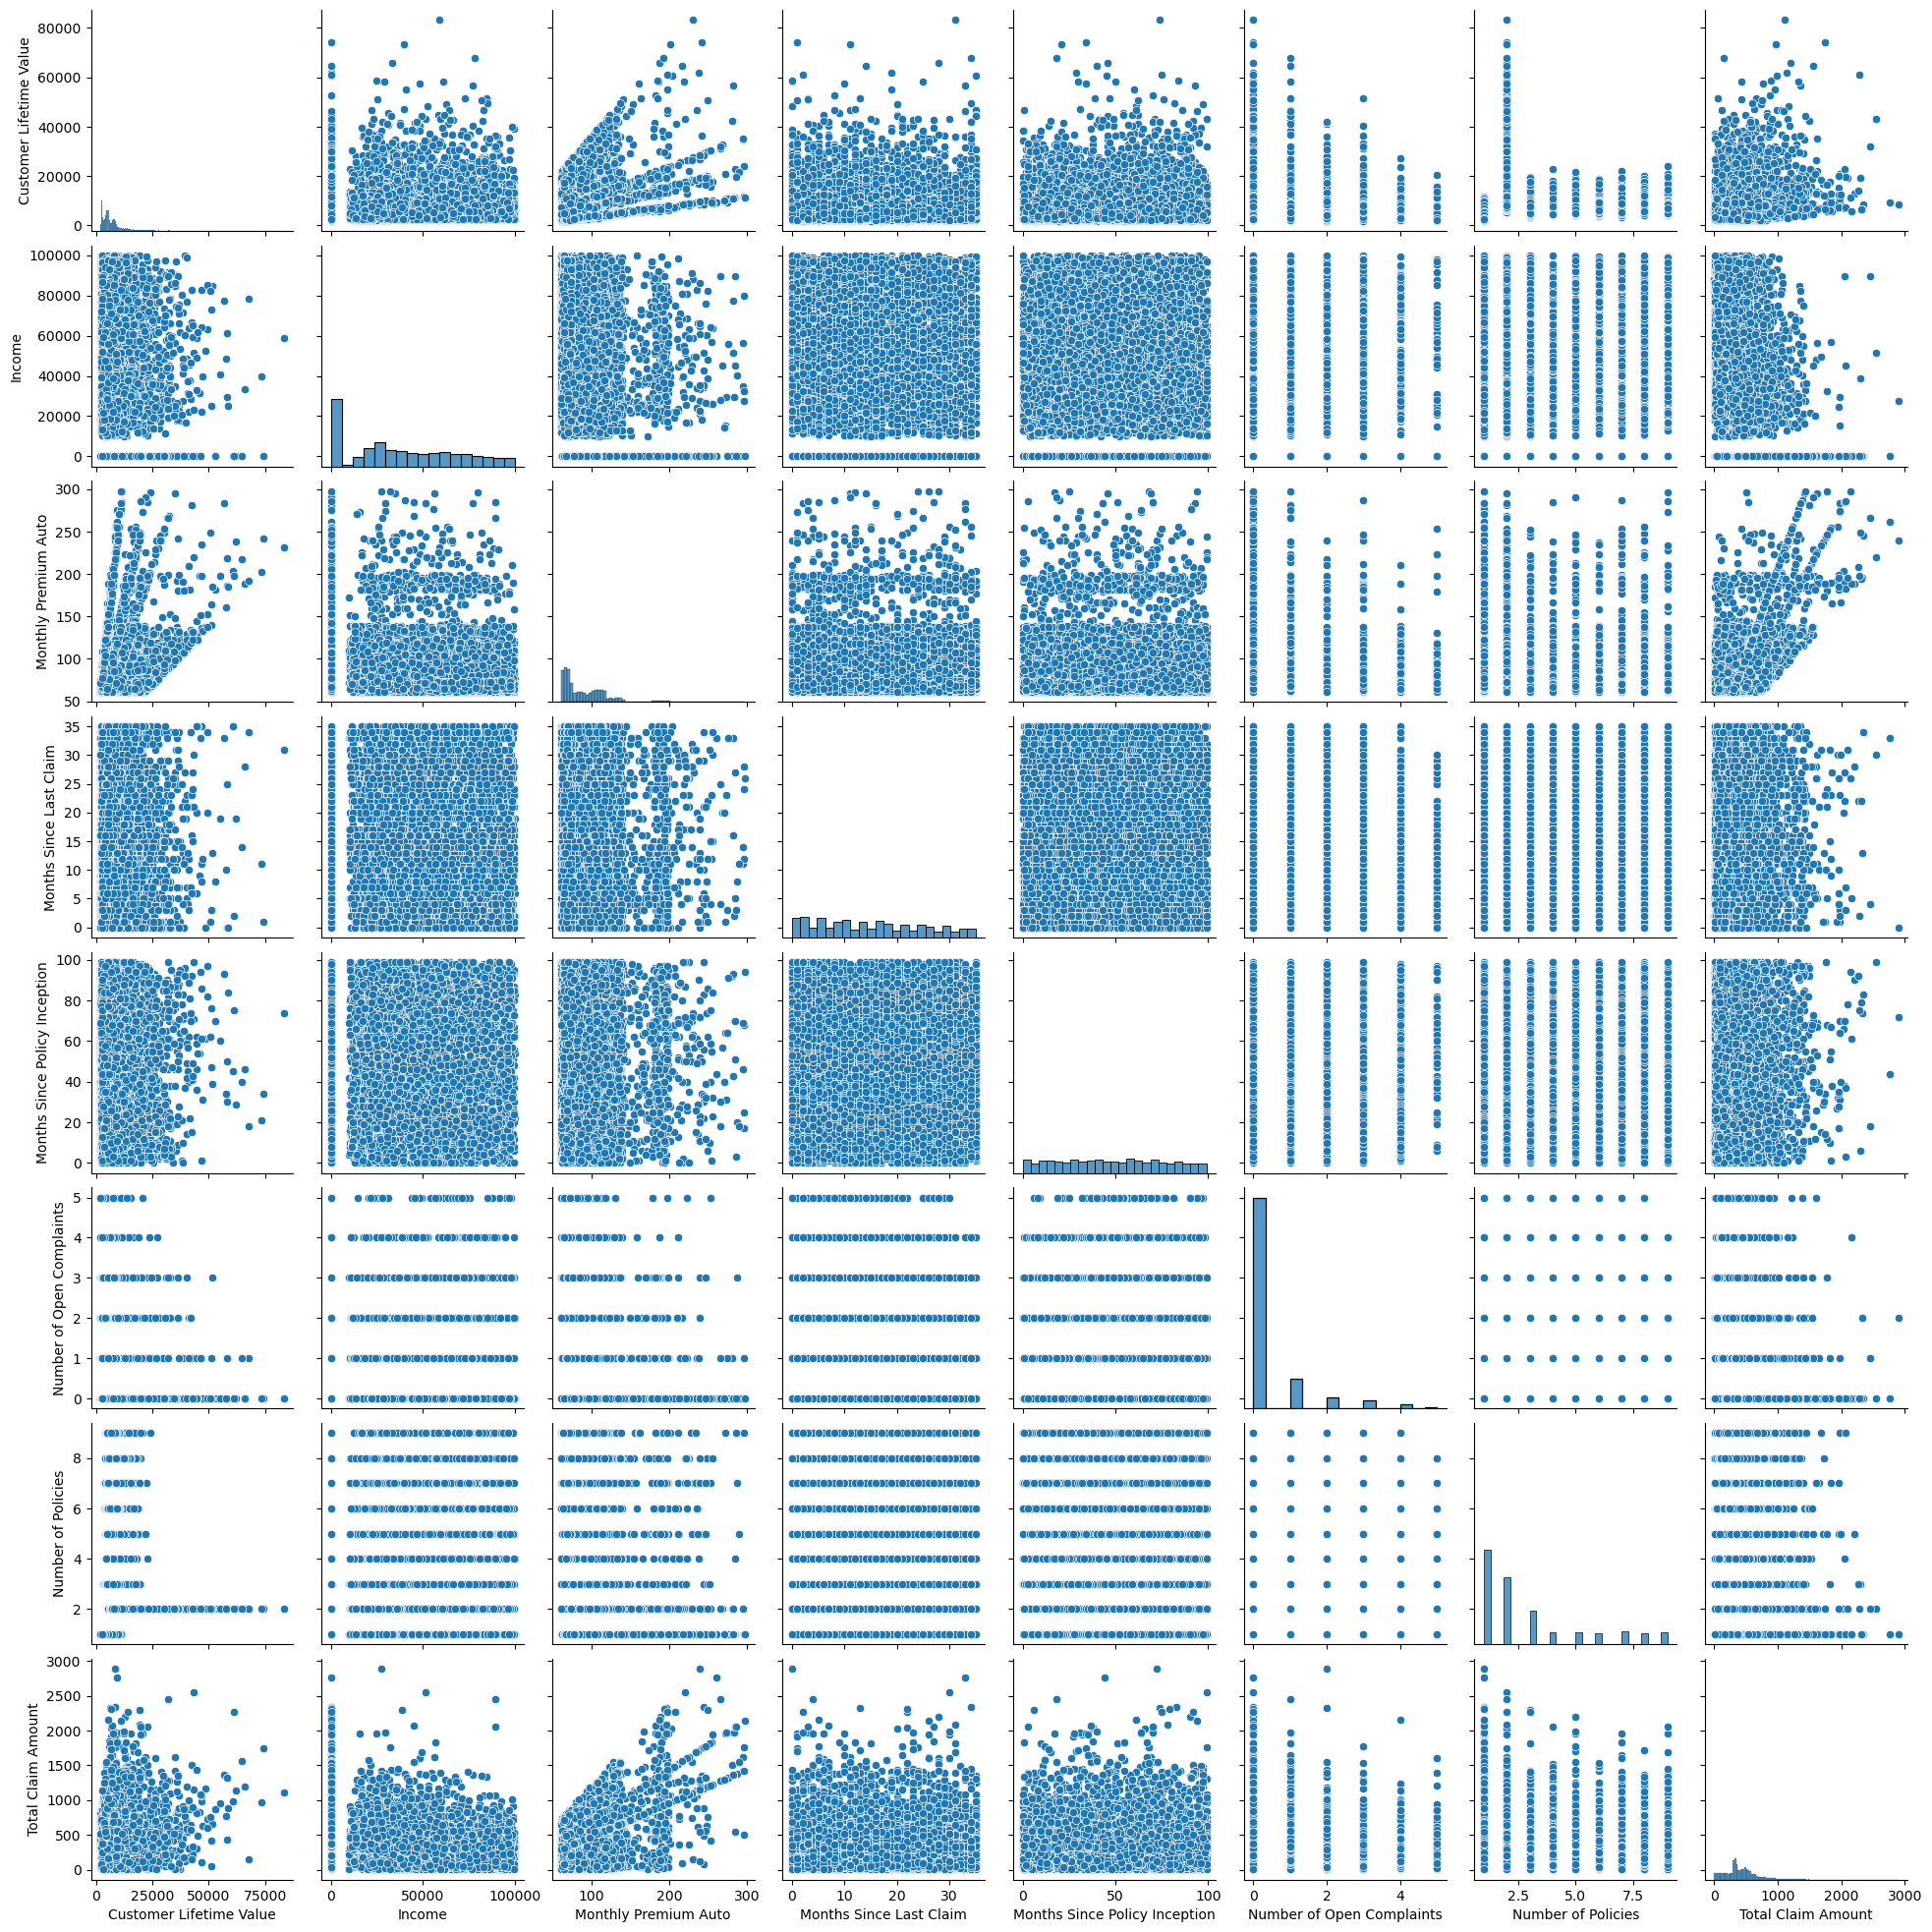

In [37]:
sns.pairplot(numerical) 

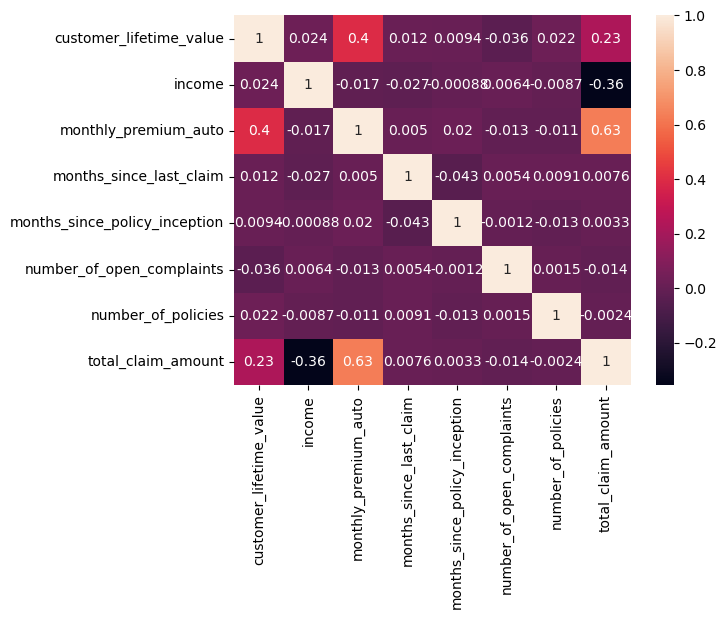

In [121]:
sns.heatmap(numerical.corr(), annot=True) 
plt.show() 

In [143]:
# Processing Data (Further processing...)  
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [144]:
# X-y split.
y = numerical.drop(['total_claim_amount'], axis=1) 
X = numerical['monthly_premium_auto'] 

display(X.head())
display(y.head()) 

0     69
1     94
2    108
3    106
4     73
Name: monthly_premium_auto, dtype: int64

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


In [145]:
dfpremiumauto = data[['monthly_premium_auto']] 

In [146]:
# Normalize (numerical). 
transformer2 = MinMaxScaler().fit(dfpremiumauto)
x_normalized2 = transformer2.transform(dfpremiumauto)
print(x_normalized2.shape)
x_normalized2
display(pd.DataFrame(x_normalized2, columns=dfpremiumauto.columns).describe()) 
x_normalized2_df = pd.DataFrame(x_normalized2, columns=dfpremiumauto.columns)


transformer3 = StandardScaler().fit(dfpremiumauto)
x_normalized3 = transformer3.transform(dfpremiumauto)
print(x_normalized3.shape)
x_normalized3
display(pd.DataFrame(x_normalized3, columns=dfpremiumauto.columns).describe()) 
x_normalized3_df = pd.DataFrame(x_normalized3, columns=dfpremiumauto.columns)

(9134, 1)


,monthly_premium_auto
count,9134.000000
mean,0.135946
std,0.145181
min,0.000000
25%,0.029536
50%,0.092827
75%,0.202532
max,1.000000


(9134, 1)


,monthly_premium_auto
count,9.134000e+03
mean,-1.480399e-16
std,1.000055e+00
min,-9.364417e-01
25%,-7.329893e-01
50%,-2.970199e-01
75%,4.586604e-01
max,5.951875e+00


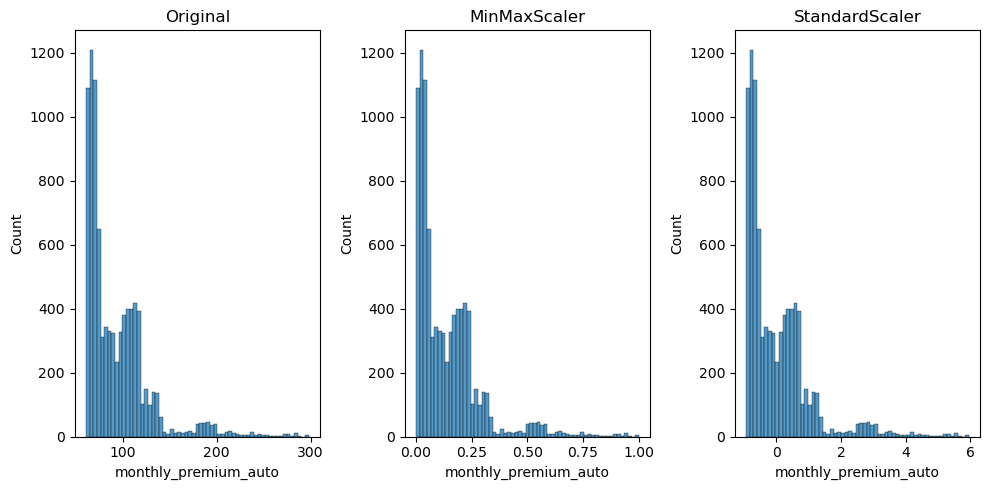

In [147]:

# show sns histplot for normal data, normalized data and standardized data

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].set_title("Original")
sns.histplot(data=dfpremiumauto, x="monthly_premium_auto", ax=ax[0])
ax[1].set_title("MinMaxScaler")
sns.histplot(data=x_normalized2_df, x="monthly_premium_auto", ax=ax[1])
ax[2].set_title("StandardScaler")
sns.histplot(data=x_normalized3_df, x="monthly_premium_auto", ax=ax[2])

plt.tight_layout()
plt.show()
